In [53]:
#importing the requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter


show_id           0
type              0
title             0
country         417
release_year      0
listed_in         0
dtype: int64
show_id         0
type            0
title           0
country         0
release_year    0
listed_in       0
dtype: int64


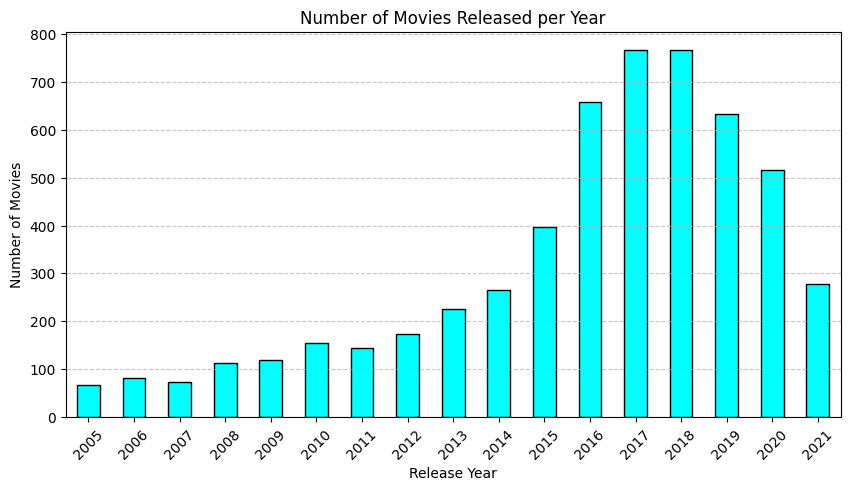

In [90]:
#---MOVIES---

# YEAR
movies = pd.read_excel("C:\\Users\\kayce\\OneDrive\\Desktop\\Movies.xlsx")
#print(movies.head())
#Checking for missing values
print(movies.isnull().sum())
#Filling missing values with 'Unknown'
movies.fillna("Unknown", inplace=True)
print(movies.isnull().sum())
# Count number of movies per year
year_counts = movies["release_year"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
year_counts.plot(kind="bar", color="cyan", edgecolor="black")

plt.title("Number of Movies Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


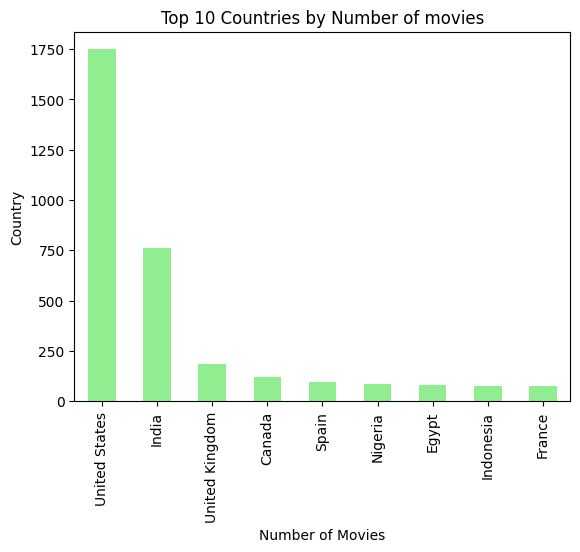

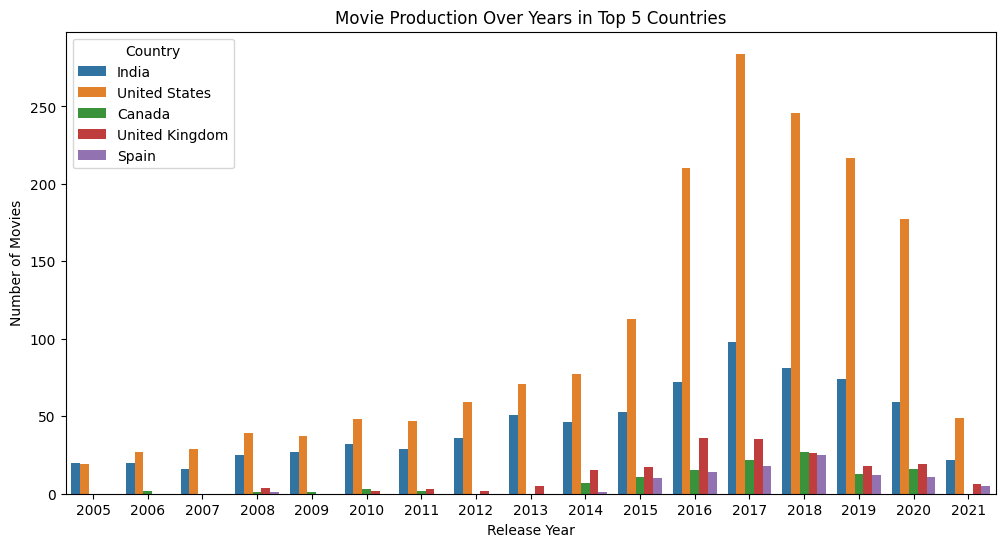

In [91]:
#COUNTRIES
#Visualizing the top countries in movie production
top_countries = movies["country"].value_counts().head(10)
excluded = ["Unknown"]
for ex in excluded:
    top_countries.pop(ex)
top_countries.plot(kind="bar", color="lightgreen")
plt.title("Top 10 Countries by Number of movies")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()

#Visualizing the top 5 countries movie production against year
top_5_countries = movies[movies["country"].isin(top_countries.index[:5])]
excluded = ["Unknown"]
for ex in excluded:
    top_5_countries = movies[
    (movies["country"].isin(top_countries.index[:5])) &
    (~movies["country"].isin(excluded))
]
plt.figure(figsize=(12, 6))
sns.countplot(data=top_5_countries, x="release_year", hue="country")
plt.title("Movie Production Over Years in Top 5 Countries")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend(title="Country")
plt.show()




In [ ]:
#GENRES
#Visualizing the most common genres
all_genres = movies["listed_in"].dropna().str.split(", ")
genre_counts = Counter([g for sublist in all_genres for g in sublist])
excluded = ["International Movies", "Independent Movies", "Documentaries", "Stand-Up Comedy", "Music", "Movies", "Cult Movies", "Classic Movies", "Children & Family Movies", "TV Shows", "LGBTQ Movies", "Faith & Spirituality"]
for ex in excluded:
    genre_counts.pop(ex, None)
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind="bar", color="violet")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

#Visualizing genre trends over the years
movies_exploded = movies.assign(listed_in=movies["listed_in"].str.split(", ")).explode("listed_in")
movies_exploded = movies_exploded[~movies_exploded["listed_in"].isin(["International Movies", "Movies", "Cult Movies", "Classic Movies", "Independent Movies", "Documentaries", "Stand-Up Comedy", "Music", "Children & Family Movies", "TV Shows", "LGBTQ Movies", "Faith & Spirituality"])]
plt.figure(figsize=(12, 6)) 
sns.countplot(data=movies_exploded, x="release_year", hue="listed_in", order=sorted(movies["release_year"].unique()), hue_order=movies_exploded["listed_in"].value_counts().index[:5])
plt.title("Genre Trends Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genre")
plt.show()

#Analyzing genre diversity by country
excluded = [
    "International Movies", "Independent Movies", "Documentaries", "Stand-Up Comedy",
    "Music", "Children & Family Movies", "TV Shows", "LGBTQ Movies", "Faith & Spirituality"
]

genre_diversity = (
    movies.dropna(subset=["listed_in", "country"])
    .assign(
        listed_in=movies["listed_in"].apply(
            lambda x: [g for g in x.split(", ") if g not in excluded]
        )
    )
    .groupby("country")["listed_in"]
    .apply(lambda x: len(set(g for sublist in x for g in sublist)))
    .sort_values(ascending=False)
)

genre_diversity.head(10)



In [ ]:
#---TV SHOWS---

#YEAR
#Loading the TV Shows dataset
tv_shows = pd.read_excel("C:\\Users\\kayce\\OneDrive\\Desktop\\TV_shows.xlsx")
#print(tv_shows.head())
#checking for missing values
print(tv_shows.isnull().sum())
#Filling missing values with 'Unknown'
tv_shows.fillna("Unknown", inplace=True)
print(tv_shows.isnull().sum())

#count number of shows per year
year_counts_shows = tv_shows["release_year"].value_counts().sort_index()
# Plot
plt.figure(figsize = (10, 5))
year_counts_shows.plot(kind = "bar", color = "cyan", edgecolor = "black")
plt.title("Number of TV Shows Released per Year")
plt.xlabel("Release year")
plt.ylabel("Number of TV Shows")
plt.show()


In [ ]:
#COUNTRIES
#Visualizing the top countries in TV show production
top_countries_shows = tv_shows["country"].value_counts().head(10)
excluded = ["Unknown"]
for ex in excluded:
    top_countries_shows.pop(ex)
top_countries_shows.plot(kind="bar", color="cyan", edgecolor="black")
plt.title("Top 10 Countries by Number of TV Shows")
plt.xlabel("Number of TV Shows")
plt.ylabel("Country")
plt.show()

#Visualizing the top 5 countries TV show production against year
top_5_countries_shows = tv_shows["country"].value_counts().head(5).index
excluded = ["Unknown"]
for ex in excluded:
    top_5_countries_shows = tv_shows[(tv_shows["country"].isin(top_5_countries_shows)) & (~tv_shows["country"].isin(excluded))]
plt.figure(figsize = (12, 6))
plt.title("TV Show Production Over Years in Top 5 Countries")
sns.countplot(data=top_5_countries_shows, x="release_year", hue="country")
plt.xlabel("Release Year")
plt.ylabel("Number of TV Shows")
plt.legend(title="Country")
plt.show()

In [ ]:
#GENRES
#Visualizing the most common genres
common_genres_shows = tv_shows["listed_in"].dropna().str.split(", ")
genre_counts_shows = Counter([g for sublist in common_genres_shows for g in sublist])
excluded = ["International TV Shows", "Kid's TV", "Docuseries", "Reality TV", "British TV Shows", "Spanish-Language TV Shows", "Independent TV Shows", "Korean TV Shows", "Science & Nature TV"]
for ex in excluded:
    genre_counts_shows.pop(ex, None)
pd.Series(genre_counts_shows).sort_values(ascending=False).head(10).plot(kind="bar",color="orange", edgecolor="black")
plt.title("Top 10 Most Common Genres in TV Shows")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

#Visualizing genre trends over the years
tv_shows_exploded = tv_shows.assign(listed_in=tv_shows["listed_in"].str.split(", ")).explode("listed_in")
tv_shows_exploded = tv_shows_exploded[~tv_shows_exploded["listed_in"].isin(["International TV Shows", "Kid's TV", "Docuseries", "Reality TV", "British TV Shows", "Spanish-Language TV Shows", "Independent TV Shows", "Korean TV Shows", "Science & Nature TV"])]
plt.figure(figsize=(12, 6))
sns.countplot(data=tv_shows_exploded, x="release_year", hue="listed_in", order=sorted(tv_shows["release_year"].unique()), hue_order=tv_shows_exploded["listed_in"].value_counts().index[:5])
plt.title("Genre Trends Over the Years in TV Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of TV Shows")
plt.legend(title="Genre")
plt.show()

#Analyzing genre diversity by country
excluded = [
    "International TV Shows", "Kid's TV", "Docuseries", "Reality TV",
    "British TV Shows", "Spanish-Language TV Shows", "Independent TV Shows",
    "Korean TV Shows", "Science & Nature TV"
]
genre_diversity_shows = (
    tv_shows.dropna(subset=["listed_in", "country"])
    .assign(
        listed_in=tv_shows["listed_in"].apply(
            lambda x: [g for g in x.split(", ") if g not in excluded]
        )
    )
    .groupby("country")["listed_in"]
    .apply(lambda x: len(set(g for sublist in x for g in sublist)))
    .sort_values(ascending=False)
)
genre_diversity_shows.head(10)

In [ ]:
# --- NEW DATASET ---
#calculating profits
#Loading the Movies dataset with budget and revenue columns
data = pd.read_csv("C:\\Users\\kayce\\Downloads\\TMDB_movie_dataset_v11.csv", usecols = ["title", "vote_count", "vote_average", "release_date", "revenue", "budget", "popularity", "genres", "production_companies"])

#Cleaning the data
data.dropna(subset=["revenue", "budget"], inplace=True) # this line removes rows with missing revenue or budget values
data["profit"] = data["revenue"] - data["budget"] #calculating profit by subtracting budget from revenue and add a new column 'profit'
data["release_year"] = pd.to_datetime(data["release_date"]).dt.year#adding a release year column
#setting data to only include release_year from 2005 to 2025
data = data[(data["release_year"] >= 2005) & (data["release_year"] <= 2025)]
print(data.head())

             title  vote_average  vote_count release_date     revenue  \
0        Inception         8.364       34495   2010-07-15   825532764   
1     Interstellar         8.417       32571   2014-11-05   701729206   
2  The Dark Knight         8.512       30619   2008-07-16  1004558444   
3           Avatar         7.573       29815   2009-12-15  2923706026   
4     The Avengers         7.710       29166   2012-04-25  1518815515   

      budget  popularity                                       genres  \
0  160000000      83.952           Action, Science Fiction, Adventure   
1  165000000     140.241            Adventure, Drama, Science Fiction   
2  185000000     130.643               Drama, Action, Crime, Thriller   
3  237000000      79.932  Action, Adventure, Fantasy, Science Fiction   
4  220000000      98.082           Science Fiction, Action, Adventure   

                                production_companies      profit  release_year  
0  Legendary Pictures, Syncopy, Warner Br

In [ ]:
#Calculate average profit of all movies per year
#calculating average profit per genre per year
#calculating average profit per production company per year
#Calculating average profit per genre per production company per year

